# **Week 10: Lab Assigment: Churn Prediction Model Development**

#### The goal of this projects is to be able to use the features provided by the churn dataset to predict customers that are likely to exit.

## **Part 1: Data Understanding** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df =pd.read_csv('Churn.csv')


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

##### The most important features seems like credit score, balance, number of products, has credit card, is a active member, and estimated salary. This really lets us know customers status in the bank. But we are also pervoided information about the customer in regards to where they live, gender, age, name, and tenure. I am curious to see if gender, age, name, and geography as any conection to the target. 

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##### I know that I should remove the row number and customer ID. I do not think there is any outliers in the credit score secation and the min and max matches up. The same with the age but it is a good idea to just check just in case. It seemed like I should be looking at skewedness instead of outliers because all of the number matches up.

In [6]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

##### It shows that there is no missing values but they can be entered as NA.

In [7]:
len(df)

10000

In [8]:
for column in df.columns:
    unique_values_counts = df['CreditScore'].value_counts()
print(unique_values_counts)

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64


In [9]:
for column in df.columns:
    unique_values_counts = df['Geography'].value_counts()
print(unique_values_counts)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [10]:
for column in df.columns:
    unique_values_counts = df['Age'].value_counts()
print(unique_values_counts)

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64


In [11]:
for column in df.columns:
    unique_values_counts = df['Tenure'].value_counts()
print(unique_values_counts)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


In [12]:
for column in df.columns:
    unique_values_counts = df['Gender'].value_counts()
print(unique_values_counts)

Male      5457
Female    4543
Name: Gender, dtype: int64


##### This shows that most people have lower than 5 tenure and I want to see if this play a role in the target in terms of the people above and less than 5.

In [13]:
for column in df.columns:
    unique_values_counts = df['Balance'].value_counts()
print(unique_values_counts)

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64


In [14]:
for column in df.columns:
    unique_values_counts = df['NumOfProducts'].value_counts()
print(unique_values_counts)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


##### not many people have number of products over 2. I do not know if should remove or not but I should see after the graphs. 

In [15]:
for column in df.columns:
    unique_values_counts = df['HasCrCard'].value_counts()
print(unique_values_counts)

1    7055
0    2945
Name: HasCrCard, dtype: int64


In [16]:
for column in df.columns:
    unique_values_counts = df['IsActiveMember'].value_counts()
print(unique_values_counts)

1    5151
0    4849
Name: IsActiveMember, dtype: int64


In [17]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

##### everything has the correct data type so it does not need to be fixed.

In [18]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### It seems like there is no missing data.

In [19]:
columns_to_remove = ['RowNumber', 'CustomerId']
df.drop(columns=columns_to_remove, inplace=True)


In [20]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
missing_values = ['NA', 'NaN', 'None', 'N/A', '']
missing_in_columns = df.isin(missing_values).any()
columns_with_missing = missing_in_columns[missing_in_columns].index
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
Index([], dtype='object')


##### I do not think there is any missing values.

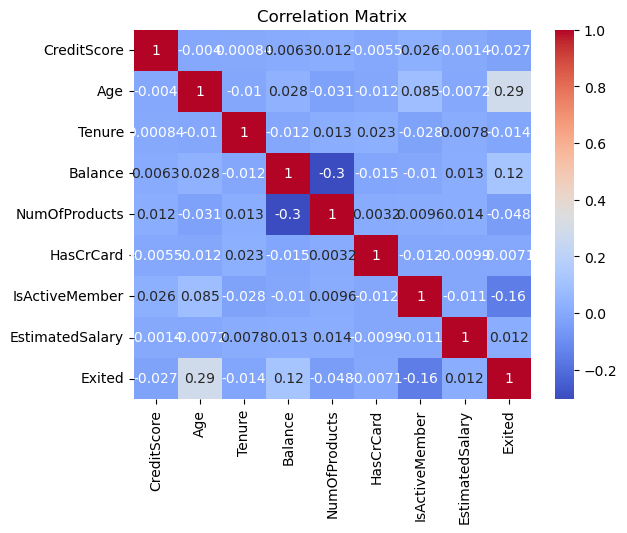

In [22]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### The higest correlation I see is betwen the traget and age, balance, and active member; so I might have to use other graphs to see relations ships. 

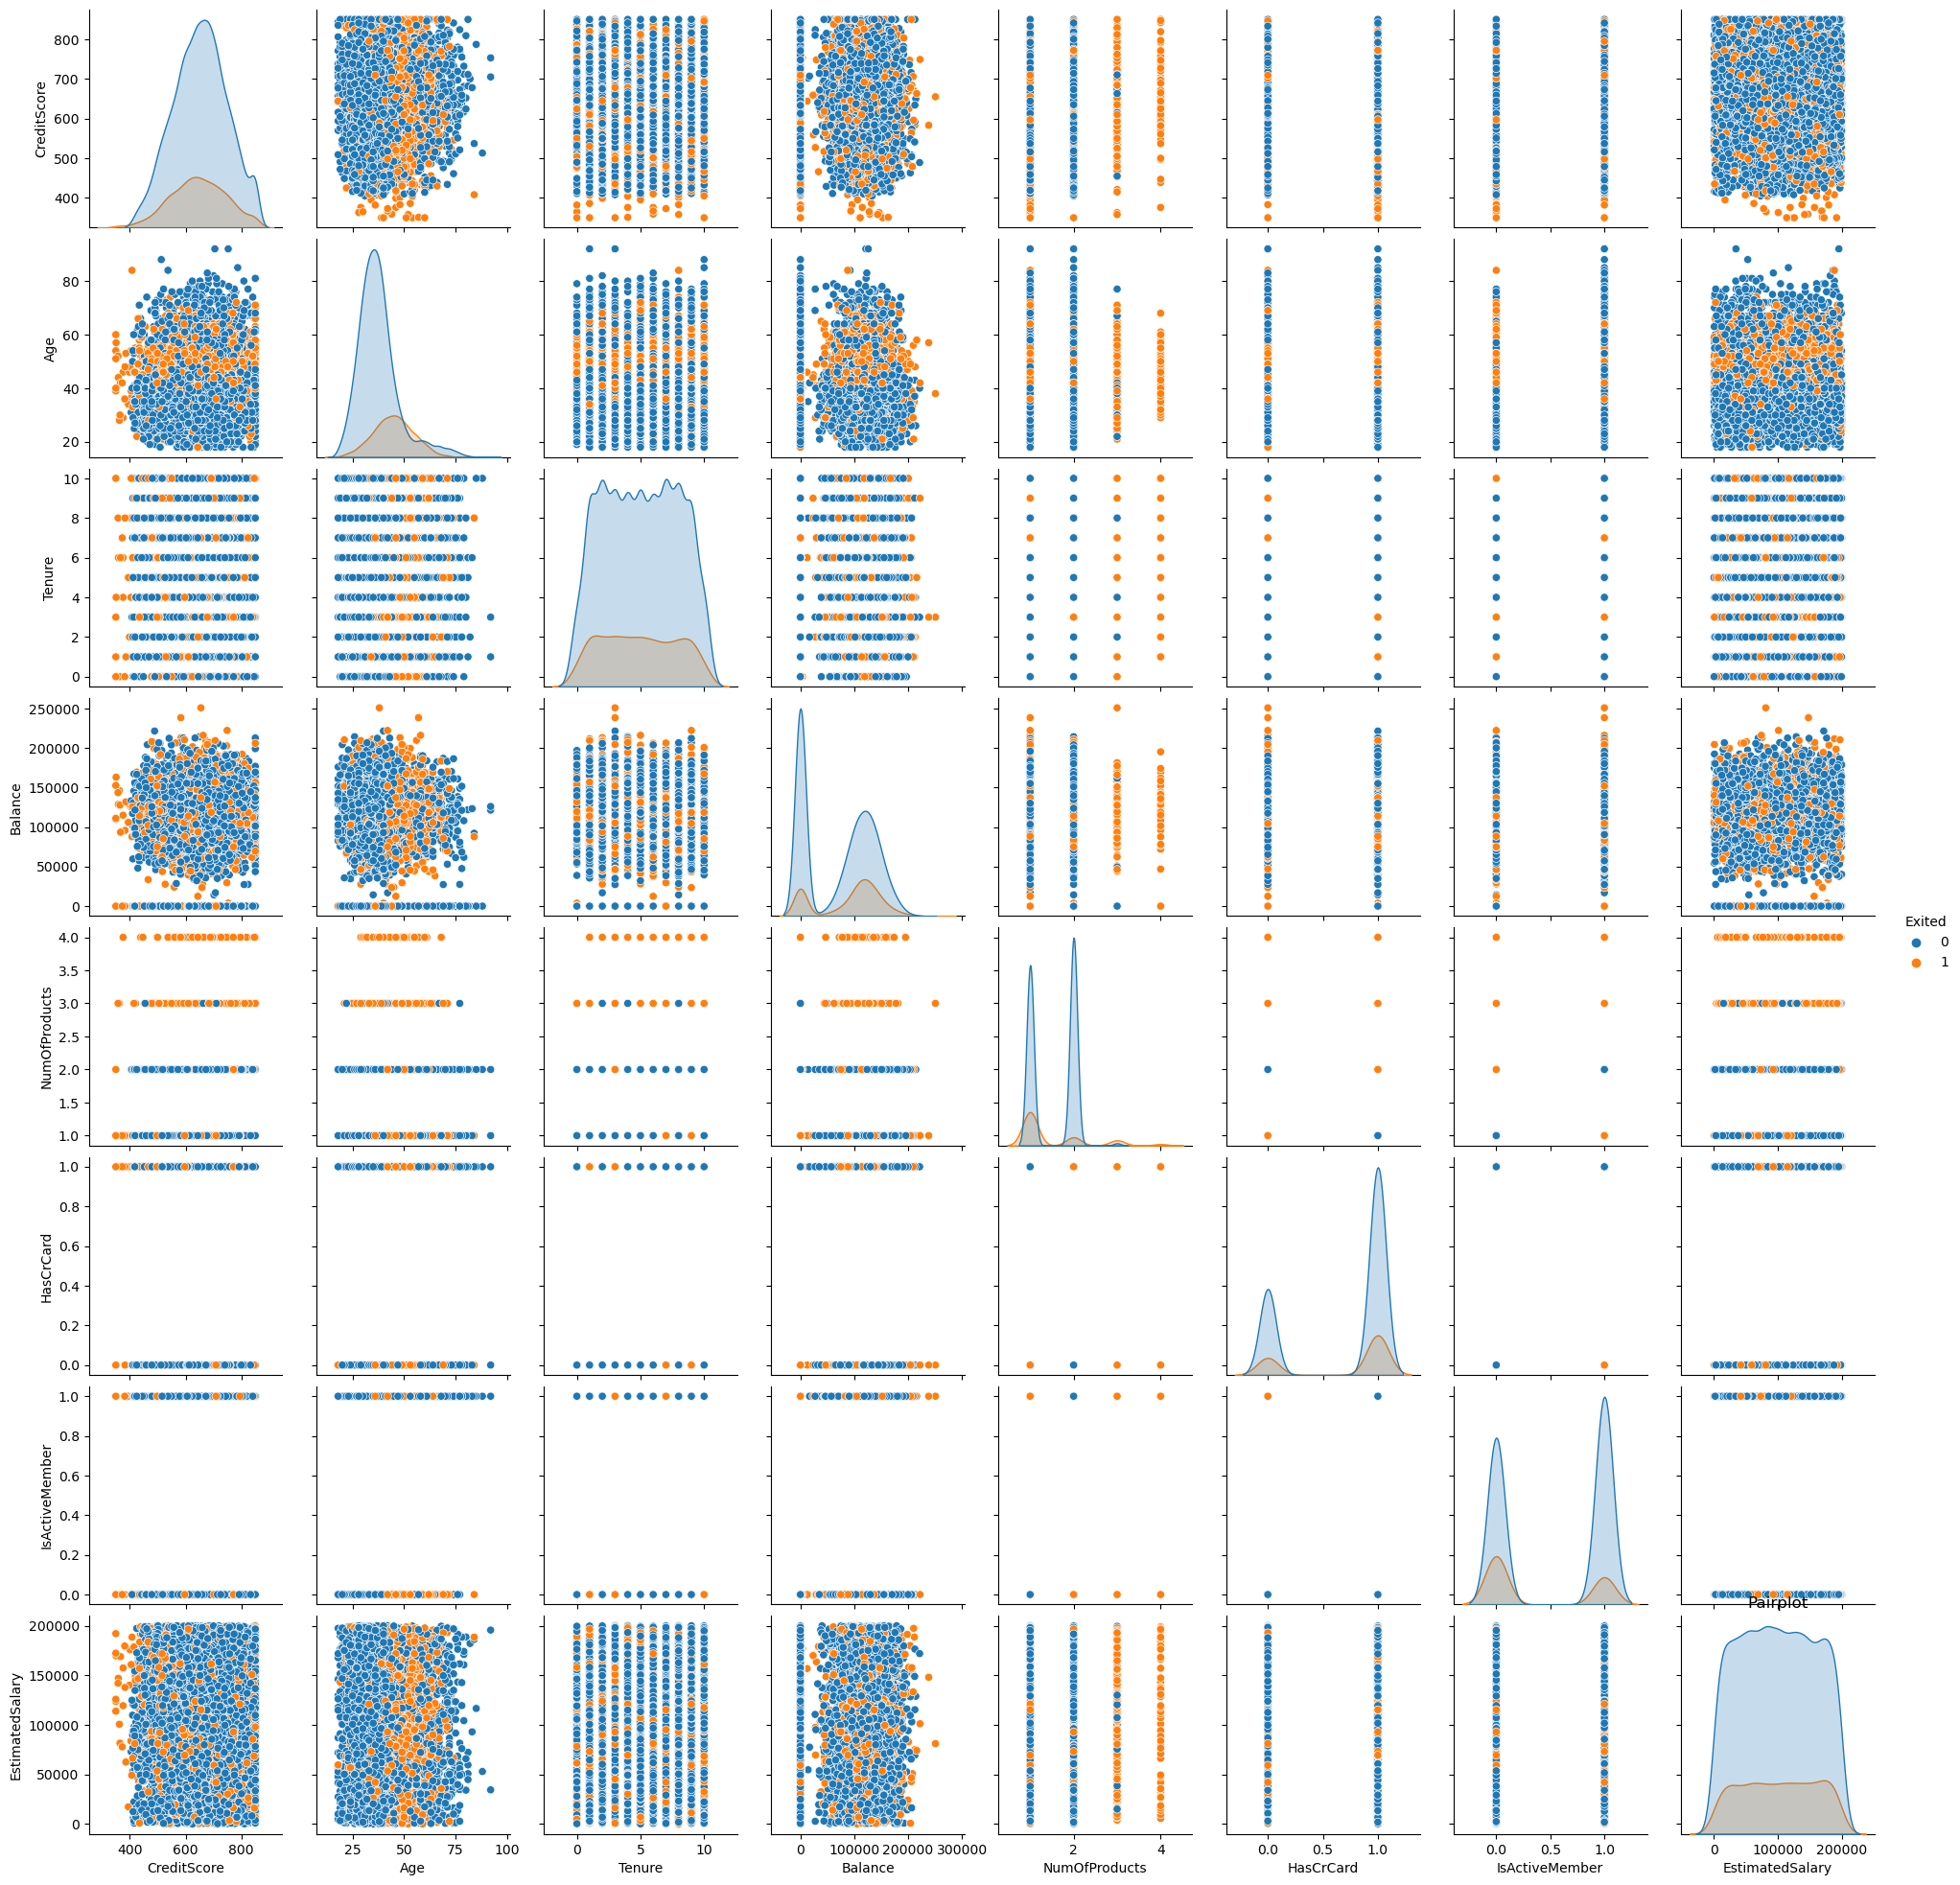

In [23]:
sns.pairplot(df, hue='Exited')
plt.title('Pairplot')
plt.show()

##### I am not getting any information this so I should try scatter plot.

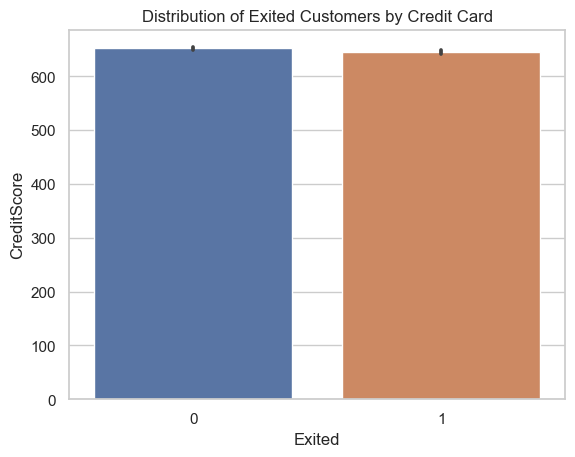

In [24]:
sns.set(style="whitegrid")
sns.barplot(x="Exited", y="CreditScore", data=df)
plt.xlabel("Exited")
plt.ylabel("CreditScore")
plt.title("Distribution of Exited Customers by Credit Card")
plt.show()

## **Part 2: Data Preproccessing**

In [25]:
df.shape

(10000, 12)

In [26]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [27]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### There is  no missing value to remove.

### **Outliers** 

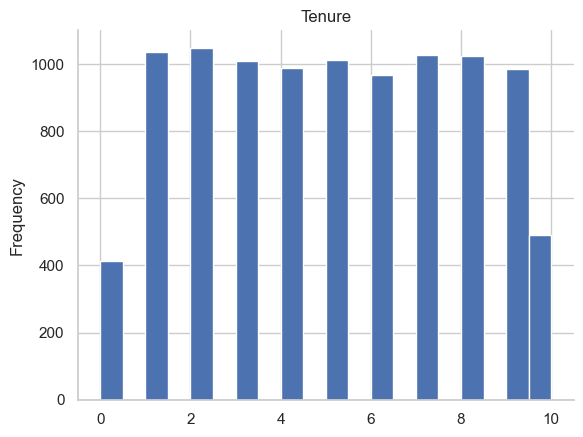

In [28]:
from matplotlib import pyplot as plt
df['Tenure'].plot(kind='hist', bins=20, title='Tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

##### There is an outlier but I think it is important to tell the full story.

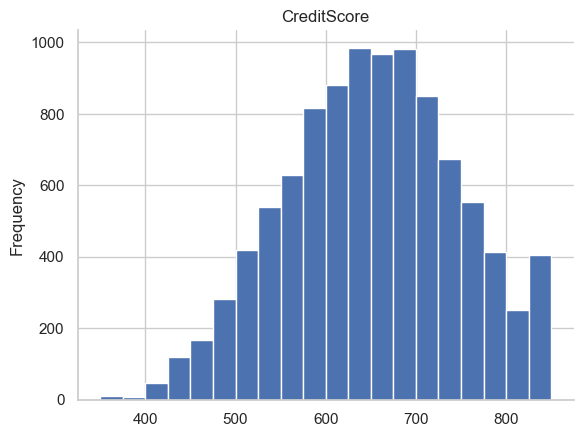

In [29]:
from matplotlib import pyplot as plt
df['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

##### I do not think you need to normalize the data and the outliers seems good. It is kind of a symmetrical data. 

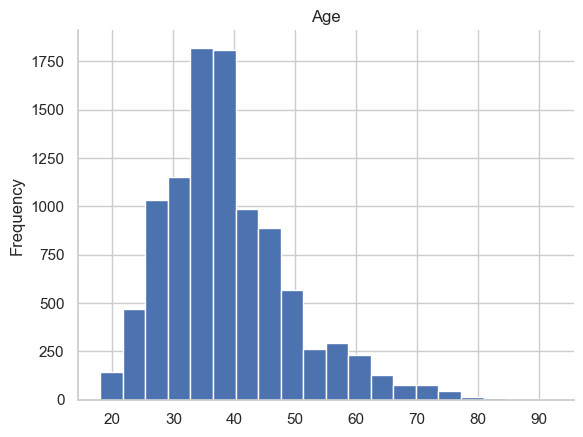

In [30]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

##### It is skewed more to left which is showing that the mode is between 30 to 40. It shows that there is no error entry, and there might be outliers but it is not by mistake or it does not move the data into one directions. 

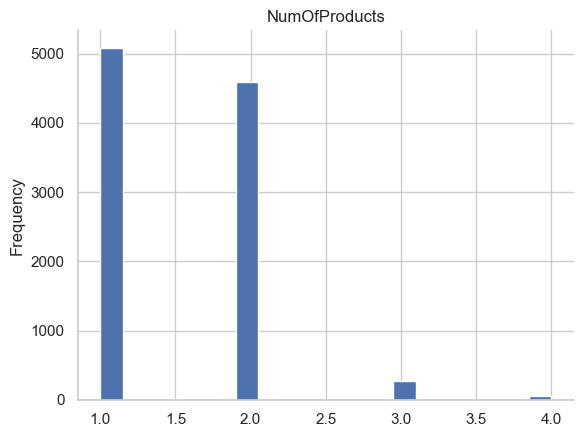

In [31]:
from matplotlib import pyplot as plt
df['NumOfProducts'].plot(kind='hist', bins=20, title='NumOfProducts')
plt.gca().spines[['top', 'right',]].set_visible(False)

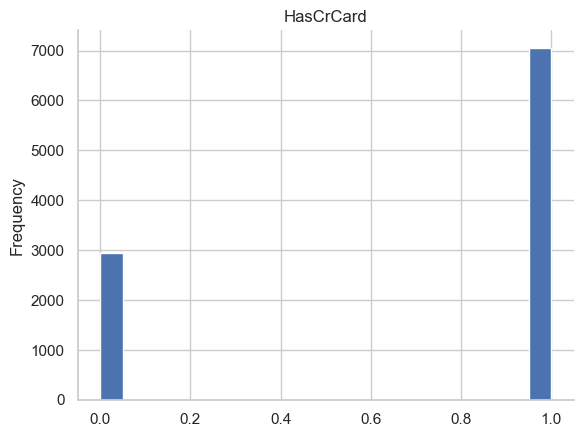

In [32]:
from matplotlib import pyplot as plt
df['HasCrCard'].plot(kind='hist', bins=20, title='HasCrCard')
plt.gca().spines[['top', 'right',]].set_visible(False)

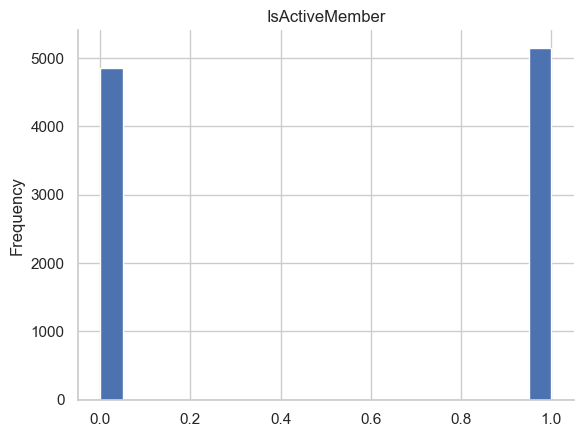

In [33]:
from matplotlib import pyplot as plt
df['IsActiveMember'].plot(kind='hist', bins=20, title='IsActiveMember')
plt.gca().spines[['top', 'right',]].set_visible(False)

##### I feel like there an equal number so this can be removed since it is not going to tell much about the story.

From these graphs there is some outliers but I do not think they should be removed because they are important for the model to get the whole story and get a better prediction.

### **Transformation**

I want to do one hot encoding for the Geography. There is 3 countries: France, Germany, and spain. I also want to do one hot encoding for the Gender. which is still female and male. This well make it easier for the model to read the data.

In [36]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
print(df.head)

<bound method NDFrame.head of         Surname  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0      Hargrave          619          0  Female   42       2       0.00   
1          Hill          608          2  Female   41       1   83807.86   
2          Onio          502          0  Female   42       8  159660.80   
3          Boni          699          0  Female   39       1       0.00   
4      Mitchell          850          2  Female   43       2  125510.82   
...         ...          ...        ...     ...  ...     ...        ...   
9995   Obijiaku          771          0    Male   39       5       0.00   
9996  Johnstone          516          0    Male   35      10   57369.61   
9997        Liu          709          0  Female   36       7       0.00   
9998  Sabbatini          772          1    Male   42       3   75075.31   
9999     Walker          792          0  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exit

In [37]:
for column in df.columns:
    unique_values_counts = df['Geography'].value_counts()
print(unique_values_counts)

0    5014
1    2509
2    2477
Name: Geography, dtype: int64


In [38]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
print(df.head)

<bound method NDFrame.head of         Surname  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0      Hargrave          619          0       0   42       2       0.00   
1          Hill          608          2       0   41       1   83807.86   
2          Onio          502          0       0   42       8  159660.80   
3          Boni          699          0       0   39       1       0.00   
4      Mitchell          850          2       0   43       2  125510.82   
...         ...          ...        ...     ...  ...     ...        ...   
9995   Obijiaku          771          0       1   39       5       0.00   
9996  Johnstone          516          0       1   35      10   57369.61   
9997        Liu          709          0       0   36       7       0.00   
9998  Sabbatini          772          1       1   42       3   75075.31   
9999     Walker          792          0       0   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exit

In [39]:
for column in df.columns:
    unique_values_counts = df['Gender'].value_counts()
print(unique_values_counts)

1    5457
0    4543
Name: Gender, dtype: int64


### **Feature Engineering**

I think the most important features are tenure, number of products, age, balance, and credit score. These features are the ones that had the most correlation in regard to the number of people that exited the bank. 

In [40]:
features_to_remove =['Surname', 'Geography', 'Gender', 'HasCrCard', 'EstimatedSalary']
df.drop(columns=features_to_remove, inplace=True)

In [41]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [42]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited
0,619,42,2,0.00,1,1,1
1,608,41,1,83807.86,1,1,0
2,502,42,8,159660.80,3,0,1
3,699,39,1,0.00,2,0,0
4,850,43,2,125510.82,1,1,0


In [49]:
df.dtypes

CreditScore         int64
Age                 int64
Tenure              int64
Balance           float64
NumOfProducts       int64
IsActiveMember      int64
Exited              int64
dtype: object

## **Part 3: ModelDevelopment and Evaluation**

The two machine learning algorithms I choose are KNN and Decision Tree. KNN is good because it is a non-paramatic algorithm because of that it will no make an assumptions about the data distribution. This is help since I did not remove the outliers in some of the features because they are not errors. 

Decision tree is good because you can visualize and understand the domain experts based on the result.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

### **Training and Validation**

In [47]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember']
X = df[features]
y = df['Exited']

In [50]:
numerical_features = ['Age', 'Balance', 'CreditScore', 'NumOfProducts', 'Tenure']

numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                        ('scaler', StandardScaler())])

In [51]:
categorical_features = ['IsActiveMember']

categorical_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='most_frequent')),
                                            ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [52]:
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),
                                               ('cat', categorical_transformer, categorical_features)])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=470)


In [54]:
dt_pipeline=Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(max_depth=5, random_state=40000))])

In [55]:
dt_pipeline.fit(X_train,y_train)

C:\Users\betty\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Balance',
                                                   'CreditScore',
                                                   'NumOfProducts', 'Tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                             

In [56]:
y_pred_dt = dt_pipeline.predict(X_test)

In [57]:
accuracy_ti = accuracy_score(y_test, y_pred_dt)
accuracy_ti

0.8573333333333333

In [58]:
precision_score(y_test,y_pred_dt)

0.7287234042553191

### **KNN**

In [59]:
knn_pipeline=Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', KNeighborsClassifier(n_neighbors=5))])

In [60]:
knn_pipeline.fit(X_train,y_train)

C:\Users\betty\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Balance',
                                                   'CreditScore',
                                                   'NumOfProducts', 'Tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                             

In [63]:
y_pred_knn = knn_pipeline.predict(X_test)

C:\Users\betty\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [62]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.8416666666666667

### **Proformance Evalution**

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
 
# KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

print("\nClassification Report:")
print("\nAccuracy Score:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))


print("\nClassification Report:")
print(classification_report(y_test, knn_predictions))
print("\nAccuracy Score:", accuracy_score(y_test, knn_predictions))


Classification Report:

Accuracy Score: 0.7783333333333333
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2400
           1       0.45      0.49      0.47       600

    accuracy                           0.78      3000
   macro avg       0.66      0.67      0.67      3000
weighted avg       0.79      0.78      0.78      3000


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      2400
           1       0.31      0.13      0.18       600

    accuracy                           0.77      3000
   macro avg       0.56      0.53      0.52      3000
weighted avg       0.71      0.77      0.73      3000


Accuracy Score: 0.767


C:\Users\betty\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


I think the KNN model performed better because the accuracy report is 84%. 